In [2]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

del torch
del torchvision

0.4.1
0.2.1


In [3]:
import sys
sys.path.append("/home/jupyter/pytorch-codes/fastai-course-2018/")

In [5]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
path = "/home/jupyter/data/dogscats/small/"
image_size = 224
arch = vgg16
batch_size = 32

In [8]:
!rm -rf {PATH}tmp

In [9]:
data = ImageClassifierData.from_paths(path, bs=batch_size, 
                                      tfms=tfms_from_model(arch, image_size))

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 32/32 [00:16<00:00,  2.38it/s]


In [11]:
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.124569   0.042195   0.988     
    1      0.084539   0.045218   0.979     
    2      0.066586   0.039263   0.986     



[0.03926250106096268, 0.986]

In [13]:
tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)

In [14]:
data = ImageClassifierData.from_paths(path, tfms=tfms, bs=batch_size, num_workers=4)

In [15]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [16]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.105309   0.037023   0.987     
    1      0.089551   0.034075   0.985     



[0.03407545050978661, 0.985]

In [17]:
learn.precompute=False

In [18]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.07882    0.031206   0.988     



[0.031206019341945647, 0.988]

In [19]:
learn.unfreeze()

In [20]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [21]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.094043   0.047924   0.983     



[0.04792400363087654, 0.983]

In [22]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.071072   0.036468   0.988     
    1      0.064456   0.037475   0.984     
    2      0.059251   0.036169   0.984     
    3      0.053861   0.058621   0.982     
    4      0.052427   0.037844   0.988     
    5      0.048255   0.0423     0.986     
    6      0.036847   0.034165   0.986     



[0.0341654686331749, 0.986]

In [24]:
learn.fit(lr, 3, cycle_len=3)

In [25]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [26]:
accuracy_np(probs, y)

0.988

In [27]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[495   5]
 [  7 493]]


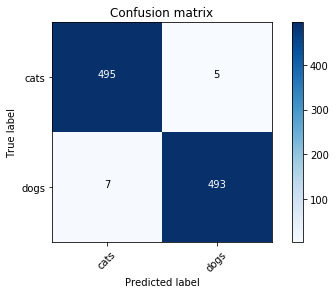

In [28]:
plot_confusion_matrix(cm, data.classes)